In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
wine = load_wine()
print wine.feature_names
print wine.target_names
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [9]:
import pandas as pd

columns = wine.feature_names
df = pd.DataFrame.from_records(wine.data)
df.columns = wine.feature_names
df['class'] = wine.target
df.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0


## K Nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
y_predict = knn.predict(X_test)
print y_test
print y_predict
print "\nAccuracy: " + str(metrics.accuracy_score(y_test, y_predict) * 100) + '%'

[2 0 1 2 2 0 1 1 1 1 0 0 1 1 2 1 2 2 2 0 1 1 1 0 1 1 2 1 1 2 1 2 1 2 0 1 1
 1 0 2 0 1 2 1 1 0 2 0 0 1 0 2 2 0]
[2 0 1 2 2 0 0 1 1 1 0 0 1 2 1 1 2 1 2 0 2 1 1 0 1 1 2 1 2 2 1 2 1 0 0 0 2
 1 0 2 0 1 1 1 1 0 0 0 0 2 0 2 1 0]

Accuracy: 75.92592592592592%


In [12]:
df_expected = pd.DataFrame(data=X_test, columns=wine.feature_names)
df_expected['class'] = y_test
df_expected.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0,2
1,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,0
2,13.03,0.90,1.71,16.0,86.0,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392.0,1
3,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570.0,2
4,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0,2


In [13]:
df_actual = pd.DataFrame(data=X_test, columns=wine.feature_names)
df_actual['class'] = y_predict
df_actual.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0,2
1,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,0
2,13.03,0.90,1.71,16.0,86.0,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392.0,1
3,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570.0,2
4,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0,2


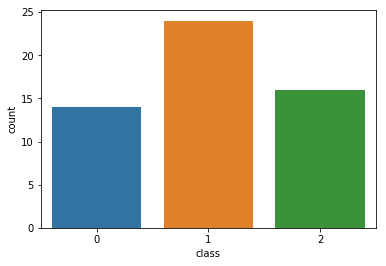

In [14]:
import seaborn as sns

sns.countplot(x='class', data=df_expected)

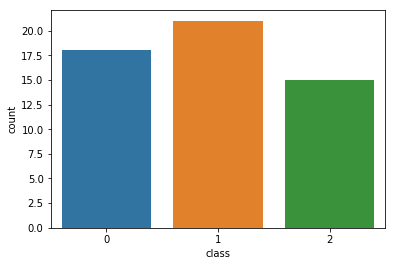

In [15]:
sns.countplot(x='class', data=df_actual)

## Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
y_predict = dtc.predict(X_test)
print y_test
print y_predict
print "\nAccuracy: " + str(metrics.accuracy_score(y_test, y_predict) * 100) + '%'

[2 0 1 2 2 0 1 1 1 1 0 0 1 1 2 1 2 2 2 0 1 1 1 0 1 1 2 1 1 2 1 2 1 2 0 1 1
 1 0 2 0 1 2 1 1 0 2 0 0 1 0 2 2 0]
[2 0 1 2 2 0 1 1 1 2 0 0 1 1 2 1 2 2 2 0 1 1 1 0 1 1 2 1 1 2 1 2 2 2 0 1 2
 1 0 2 0 1 2 2 1 0 2 0 0 1 0 2 2 0]

Accuracy: 92.5925925925926%


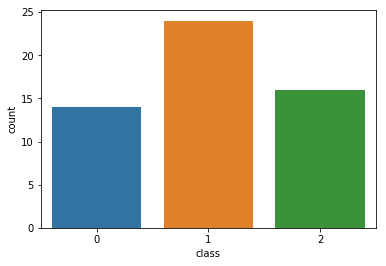

In [18]:
sns.countplot(x='class', data=df_expected)

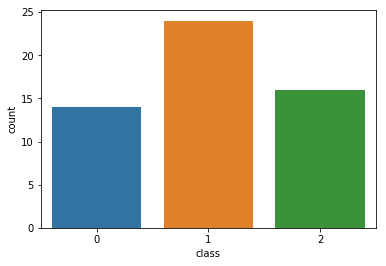

In [19]:
df_actual = pd.DataFrame(data=X_test, columns=wine.feature_names)
df_actual['class'] = y_predict
sns.countplot(x='class', data=df_expected)

## Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
y_predict = rfc.predict(X_test)
print y_test
print y_predict
print "\nAccuracy: " + str(metrics.accuracy_score(y_test, y_predict) * 100) + '%'

[2 0 1 2 2 0 1 1 1 1 0 0 1 1 2 1 2 2 2 0 1 1 1 0 1 1 2 1 1 2 1 2 1 2 0 1 1
 1 0 2 0 1 2 1 1 0 2 0 0 1 0 2 2 0]
[2 0 1 2 2 0 1 1 1 2 0 0 1 1 2 1 2 2 2 0 1 1 1 0 1 1 2 1 1 2 1 2 1 2 0 0 2
 1 0 2 0 1 2 1 1 0 2 0 0 1 0 2 2 0]

Accuracy: 94.44444444444444%


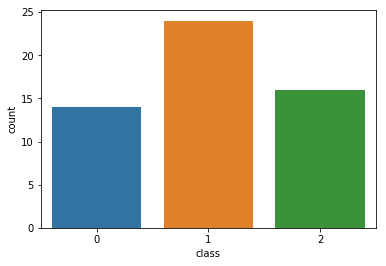

In [22]:
sns.countplot(x='class', data=df_expected)

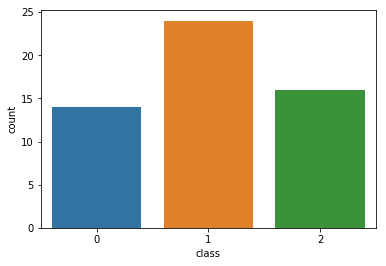

In [23]:
df_actual = pd.DataFrame(data=X_test, columns=wine.feature_names)
df_actual['class'] = y_predict
sns.countplot(x='class', data=df_expected)